# Introduction to finite differences

## Basic concept

The method of finite differences is used, as the name suggests, to transform infinitesimally small differences of variables in differential equations to small but finite differences. This enables solution of these equations by means of numerical calculations in a computer. This might be necessary if the equations at hand are too complicated to be solved analytically, or if the geometry of the problem is too complex.

The starting point for the finite differences method is the definition of a derivative:

$$
\begin{equation}
  \frac{\mathrm{d}f}{\mathrm{d}x}\Big\rvert_{x=x_0} = \lim_{\Delta x \rightarrow 0} \frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x}
  = \lim_{\Delta x \rightarrow 0} \frac{f(x_0) - f(x_0 - \Delta x)}{\Delta x}
\end{equation}
$$

However, computers can only handle numbers of finite value, not infinitesimally small values such as $\Delta x$ at the limit used in the definition. Thus, the derivative is approximated by dropping out the limit:

$$
\begin{equation}
  \frac{\mathrm{d}f}{\mathrm{d}x}\Big\rvert_{x=x_0} \approx \frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x}
\approx \frac{f(x_0) - f(x_0 - \Delta x)}{\Delta x}
\end{equation}
$$

where $\Delta x$ is *sufficiently small*. If we could choose arbitrarily small values of $\Delta x$, we would reach the exact value of the derivative, but in reality we are always limited by the numerical accuracy of the computer.

Let's look again at our finite differences presented above.

$$
\begin{equation}
  \frac{\mathrm{d}f}{\mathrm{d}x}\Big\rvert_{x=x_0} \approx \frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x}
\approx \frac{f(x_0) - f(x_0 - \Delta x)}{\Delta x}
\end{equation}
$$

The first approximation above is called the *forward difference*, and the second is the *backward difference*. 
One can define also the *central difference* approximation:

$$
\begin{equation}
  \frac{\mathrm{d}f}{\mathrm{d}x}\Big\rvert_{x=x_0} \approx \frac{ f(x_0 + \Delta x) - f(x_0 - \Delta x)}{2\Delta x}
\end{equation}
$$

Other approximations exist, too.

### Determining the computer's numerical accuracy

So, how well can a computer store small numbers? One way to assess this is to create a loop that adds increasingly small numbers to the number 1 and then reports the point at which adding the small number does not increase the sum. An example can be seen below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 1
while (1 + 2**(-n) != 1):
    n = n + 1
print(n)

53


## Taylor series approach and accuracy

Taylor's Theorem states that a function $f$ can be presented with following series in the vicinity of $a$:

$$ f(x) = f(a) + \frac{df}{dx}\frac{(x-a)}{1!} + \frac{d^2f}{dx^2}\frac{(x-a)^2}{2!} + \frac{d^3f}{dx^3}\frac{(x-a)^3}{3!} + \ldots $$

The finite differences approximation is based on truncating the series, typically after the second term, leading to 

$$ \frac{f(x) - f(a)}{x-a} = \frac{df}{dx} + \mathcal{O}((x-a)^2) $$

$\mathcal{O}$ represents the *truncation error*, and shows that if $x-a$ (i.e. $\Delta x$) is halved, the error is dropped to one-fourth. This applies to central difference. Forward and backward differences are *first-order accurate*.

## Approximating derivatives

Let's define a known function $f(x)=\sin(2x)+2\cos(x)$ and plot it on range $x=[-2,2]$:

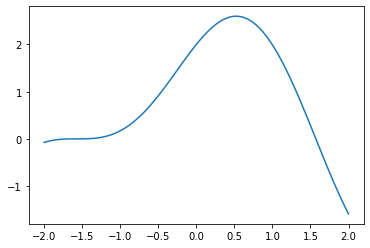

In [3]:
def f(x):
    return np.sin(2 * x) + 2 * np.cos(x)

x = np.linspace(-2, 2, 100)

plt.plot(x, f(x))
plt.show()

From math we know that $\frac{df}{dx} = 2\cos(2x) - 2\sin(x)$. Let's now define this as a Python function and plot it, together with $f$.

### Exercise - Calculating a derivative function

 - Define a function `dfdx` that returns the analytically calculated derivative of $f$

In [6]:
# TODO: Define function `dfdx` here
def dfdx(x):
    return 2 * np.cos(2 * x) - 2 * np.sin(x)

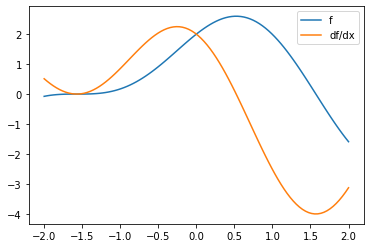

In [7]:
x = np.linspace(-2, 2, 100)

plt.plot(x, f(x), label='f')
plt.plot(x, dfdx(x), label='df/dx')
plt.legend()
plt.show()

To calculate $\frac{df}{dx}$ numerically, using finite differences, we can define a function that computes the derivative of a given function $g$ at given position $x_0$, using *step size* $dx$.

In [8]:
def dfdx_fd(g, x0, dx):
    return (g(x0+dx)-g(x0))/dx

Let's plot this on top of the analytical solution.

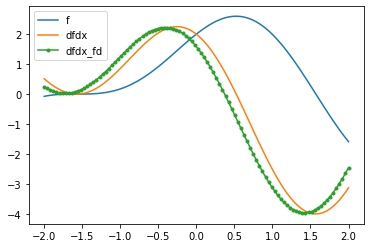

In [9]:
plt.plot(x, f(x), label='f')
plt.plot(x, dfdx(x), label='dfdx')
plt.plot(x, dfdx_fd(f, x, 0.3), '.-', label='dfdx_fd')
plt.legend()
plt.show()

### Exercise - Changing the spatial difference

 - Vary the third parameter `dx` of the previous plot. Change it from 0.3 to larger and smaller values. What happens?

### Exercise - Backward and central differences
 
- Create new functions for the definition of the
    - The backward difference (`dfdx_fd_bd`)
    - The central difference (`dfdx_fd_cd`)
    
How does the derivative approximation change? Plot your results in the Python cell above.

In [ ]:
# TODO: Define function `dfdx_fd_bd` here


In [ ]:
# TODO: Define function `dfdx_fd_cd` here


## Calculating the error

In the cell below you have the original definition of the function $f$, its analytical derivative, its forward difference derivative, and the error (the difference between the two derivatives).

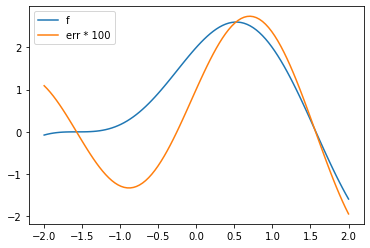

In [10]:
def f(x):
    return np.sin(2*x) + 2*np.cos(x)

def dfdx(x):
    return 2*np.cos(2*x) - 2*np.sin(x)

def dfdx_fd(g, x0, dx):
    return (g(x0+dx)-g(x0))/dx

def err(x):
    return dfdx(x) - dfdx_fd(f, x, 0.01)

plt.plot(x, f(x), label='f')
plt.plot(x, 100*err(x), label='err * 100')
plt.legend()
plt.show()

### Exercise - Exploring the error

 - Compare error to the function itself. When is the error (its absolute value) largest? It may help to plot the derivative of $f$.

### Exercise - Finding a "good" function

- Choose another function $f$ and modify definitions of `f` and its analytically solved derivative `dfdx` above accordingly. What kind of function gives the smallest error?

### Exercise - Backward and central difference errors

- Calculate the error for your functions for the definition of the
    - The backward difference (`dfdx_fd_bd`)
    - The central difference (`dfdx_fd_cd`)
    
How does the error change?

## Applying finite differences to a physical problem

If we know the analytical form of $f$, there is often little interest in approximating its derivative numerically. Instead, derivative approximations are used indirectly to approximate the values of $f$ itself. Let's see how this works in a simple example of a falling sphere.

Consider a solid sphere in a viscous fluid, with $\rho_\mathrm{sphere} > \rho_\mathrm{fluid}$. Gravity pulls the sphere downwards, causing a buoyancy force

\begin{equation}
  F_\mathrm{b} = V\Delta\rho g = V (\rho_\mathrm{sphere} - \rho_\mathrm{fluid}) g.
\end{equation}

The viscous fluid resists the movement of the sphere downwards. The drag caused is given by Stokes's law,

\begin{equation}
  F_\mathrm{d} = -6\pi\eta R v.
\end{equation}

The sum of forces acting on the ball is then

\begin{align}
  \sum F &= m_\mathrm{sphere} a \newline
  &= V\rho_\mathrm{sphere} a \newline
  &= F_\mathrm{d} + F_\mathrm{b} \newline
  &= -6\pi\eta R v + V (\rho_\mathrm{sphere} - \rho_\mathrm{fluid}) g.
\end{align}

Simplifying, and noting that $V = \frac{4}{3}\pi R^3$ and acceleration $a=\frac{dv}{dt}$, gives 

\begin{equation}
  \frac{dv}{dt} = -\frac{9 \eta v}{\rho_\mathrm{sphere} 2 R^2} + \frac{(\rho_\mathrm{sphere} - \rho_\mathrm{fluid}) g}{\rho_\mathrm{sphere}}
\end{equation}

### A case without finite differences

When the sphere has reached its terminal velocity, the acceleration is zero, so

\begin{equation}
  dv/dt = 0 \Rightarrow v = \frac{2}{9}\frac{\Delta \rho R^2 g}{\eta}
\end{equation}

In this case we're able to directly calculate the terminal velocity. This can be directly converted to a Python function, as shown below.

In [ ]:
def vel_term_stokes(rhosphere, rhofluid, radius, viscosity):
    """Returns the terminal velocity of a solid sphere sinking in a viscous fluid"""
    return (2.0/9.0)*(rhosphere-rhofluid)*radius*radius*9.81 / viscosity

Thus, for a marble with a radius of 2 cm sinking in honey we find the terminal velocity is

In [ ]:
vel_term_stokes(2800, 1300, 0.02, 250)

### A case with finite differences

If we again consider our general case for the sinking ball velocity, 

\begin{equation}
  \frac{dv}{dt} = -\frac{9 \eta v}{\rho_\mathrm{sphere} 2 R^2} + \frac{(\rho_\mathrm{sphere} - \rho_\mathrm{fluid}) g}{\rho_\mathrm{sphere}},
\end{equation}

we could solve the problem by integrating both sides of the expression for acceleration. However, as an example, we will solve this numerically.

To apply finite differences, we replace all derivatives with their finite approximations at time $t_0$. In this case,

\begin{equation}
  \frac{dv}{dt}\Big\rvert_{t=t_0} \approx \frac{v(t_0+\Delta t) - v(t_0)}{\Delta t}
\end{equation}

Inserting this into the previous formula gives

\begin{equation}
  \frac{v(t_0+\Delta t) - v(t_0)}{\Delta t} = -\frac{9 \eta v(t_0)}{\rho_\mathrm{sphere} 2 R^2} + \frac{(\rho_\mathrm{sphere} - \rho_\mathrm{fluid})g}{\rho_\mathrm{sphere}}.
\end{equation}

Note that on the right hand side $v$ has been replaced by $v(t_0)$.

In other words, if we know velocity at some time $t_0$ (i.e., $v(t_0)$), we can calculate the velocity after time $\Delta t$ has elapsed: 

\begin{equation}
  v(t_0 + \Delta t) = \left(-\frac{9 \eta v(t_0)}{\rho_\mathrm{sphere} 2 \pi R^2} + \frac{(\rho_\mathrm{sphere} - \rho_\mathrm{fluid})g}{\rho_\mathrm{sphere}}\right) \Delta t + v(t_0)
\end{equation}

Let's write this as a python function.

In [ ]:
def vel_next(vel_prev, dt, rhosphere, rhofluid, radius, viscosity):
    """Returns the velocity of a solid sphere sinking in a viscous fluid"""
    return (-9*viscosity*vel_prev / (rhosphere*2*radius*radius) + (rhosphere-rhofluid)*9.81/rhosphere)*dt + vel_prev

In [ ]:
dt = 0.0001
v0 = 0.0
v1 = vel_next(v0, dt, 2800, 1300, 0.02, 250)
v2 = vel_next(v1, dt, 2800, 1300, 0.02, 250)
v3 = vel_next(v2, dt, 2800, 1300, 0.02, 250)
v4 = vel_next(v3, dt, 2800, 1300, 0.02, 250)
v5 = vel_next(v4, dt, 2800, 1300, 0.02, 250)
v6 = vel_next(v5, dt, 2800, 1300, 0.02, 250)
v7 = vel_next(v6, dt, 2800, 1300, 0.02, 250)
v1, v2, v3, v4, v5, v6, v7

To make this more useful, we can automate the calculation of the steps.

In [ ]:
dt = 0.0001   # time step size
v0 = 0.0      # initial condition
nt = 50       # num of time steps to calculate

v = np.zeros(nt)   # stores calculated velocities
t = np.zeros(nt)   # stores total time in seconds

v[0] = v0
t[0] = 0.0

for it in range(1,nt):
    v[it] = vel_next(v[it-1], dt, 2800, 1300, 0.02, 250)
    t[it] = t[it-1] + dt
    
plt.plot(t, v, '.-')
plt.show()

print("Velocity at time", t[-1], "s is", v[-1])

### Exercise - Dropping the ball

- Use the code above to investigate what happens if the ball is being dropped from an elevation just slightly above the surface of the fluid. How do you need to modify the code?

### Exercise - Explicit and implicit solutions

- Go back to the finite differences approximation of the equation above and replace $v(t_0)$ on the right hand side by $v(t_0 + \Delta t)$. Rearrange the equation so that you have an expression for $v(t_0 + \Delta t) = \ldots$. 
    - Implement a function `vel_next_implicit`, similar to `vel_next` that calculates the velocity at next time step, but uses this modified expression.
    - Copy and modify the code above so that you create a storage for both velocity values calculated using `vel_next` and `vel_next_implicit`, and plot the outcome on top of each other. Vary the value of `dt` and see what happens.  

In [ ]:
# Implement `vel_next_implicit` here


The first approximation (`vel_next`) is the forward difference approximation. `vel_next_implicit` is the backward difference approximation. When applied to functions of time, these are also called *explicit* and *implicit* approximations.